In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')

print("="*60)
print("GRADIENT DESCENT OPTIMIZATION METHODS")
print("Comparative Analysis")
print("="*60)

GRADIENT DESCENT OPTIMIZATION METHODS
Comparative Analysis


# PART 1: TEST FUNCTIONS

In [10]:
def rosenbrock(x, y):
    """
    Rosenbrock function (banana function)
    Global minimum at (1, 1) with f(1,1) = 0
    Challenging due to narrow curved valley
    """
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    """Gradient of Rosenbrock function"""
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def sphere(x, y):
    """
    Sphere function (simple convex)
    Global minimum at (0, 0) with f(0,0) = 0
    Easy optimization problem
    """
    return x**2 + y**2

def sphere_gradient(x, y):
    """Gradient of sphere function"""
    return np.array([2*x, 2*y])

def beale(x, y):
    """
    Beale function (multimodal)
    Global minimum at (3, 0.5) with f(3, 0.5) = 0
    Multiple local minima
    """
    term1 = (1.5 - x + x*y)**2
    term2 = (2.25 - x + x*y**2)**2
    term3 = (2.625 - x + x*y**3)**2
    return term1 + term2 + term3

def beale_gradient(x, y):
    """Gradient of Beale function"""
    dx = (2 * (1.5 - x + x*y) * (y - 1) +
          2 * (2.25 - x + x*y**2) * (y**2 - 1) +
          2 * (2.625 - x + x*y**3) * (y**3 - 1))
    dy = (2 * (1.5 - x + x*y) * x +
          2 * (2.25 - x + x*y**2) * 2*x*y +
          2 * (2.625 - x + x*y**3) * 3*x*y**2)
    return np.array([dx, dy])


# PART 2: OPTIMIZATION ALGORITHMS

In [11]:
def gradient_descent(grad_func, start, learning_rate=0.01,
                    max_iter=1000, tol=1e-6):
    """
    Standard Gradient Descent (GD)

    Update rule: x_{t+1} = x_t - α * ∇f(x_t)
    """
    path = [start.copy()]
    x = start.copy()

    for i in range(max_iter):
        grad = grad_func(x[0], x[1])
        x_new = x - learning_rate * grad
        path.append(x_new.copy())

        # Convergence check
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)

def momentum(grad_func, start, learning_rate=0.01, beta=0.9,
            max_iter=1000, tol=1e-6):
    """
    Gradient Descent with Momentum

    Update rule:
    v_{t+1} = β * v_t + α * ∇f(x_t)
    x_{t+1} = x_t - v_{t+1}
    """
    path = [start.copy()]
    x = start.copy()
    v = np.zeros_like(x)

    for i in range(max_iter):
        grad = grad_func(x[0], x[1])
        v = beta * v + learning_rate * grad
        x_new = x - v
        path.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)

def nesterov(grad_func, start, learning_rate=0.01, beta=0.9,
            max_iter=1000, tol=1e-6):
    """
    Nesterov Accelerated Gradient (NAG)

    Update rule:
    v_{t+1} = β * v_t + α * ∇f(x_t - β * v_t)
    x_{t+1} = x_t - v_{t+1}
    """
    path = [start.copy()]
    x = start.copy()
    v = np.zeros_like(x)

    for i in range(max_iter):
        # Look ahead
        x_ahead = x - beta * v
        grad = grad_func(x_ahead[0], x_ahead[1])
        v = beta * v + learning_rate * grad
        x_new = x - v
        path.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)

def adagrad(grad_func, start, learning_rate=0.5,
           max_iter=1000, tol=1e-6, eps=1e-8):
    """
    Adaptive Gradient (AdaGrad)

    Update rule:
    G_t = G_{t-1} + (∇f(x_t))^2
    x_{t+1} = x_t - (α / √(G_t + ε)) * ∇f(x_t)
    """
    path = [start.copy()]
    x = start.copy()
    G = np.zeros_like(x)

    for i in range(max_iter):
        grad = grad_func(x[0], x[1])
        G += grad**2
        x_new = x - (learning_rate / (np.sqrt(G) + eps)) * grad
        path.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)

def adam(grad_func, start, learning_rate=0.01, beta1=0.9, beta2=0.999,
        max_iter=1000, tol=1e-6, eps=1e-8):
    """
    Adaptive Moment Estimation (Adam)

    Update rule:
    m_t = β1 * m_{t-1} + (1 - β1) * ∇f(x_t)
    v_t = β2 * v_{t-1} + (1 - β2) * (∇f(x_t))^2
    m̂_t = m_t / (1 - β1^t)
    v̂_t = v_t / (1 - β2^t)
    x_{t+1} = x_t - α * m̂_t / (√v̂_t + ε)
    """
    path = [start.copy()]
    x = start.copy()
    m = np.zeros_like(x)
    v = np.zeros_like(x)

    for t in range(1, max_iter + 1):
        grad = grad_func(x[0], x[1])

        # Update biased moments
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad**2

        # Bias correction
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)

        # Update parameters
        x_new = x - learning_rate * m_hat / (np.sqrt(v_hat) + eps)
        path.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return np.array(path)


# PART 3: VISUALIZATION FUNCTIONS

In [8]:
def plot_contour_with_path(func, paths, labels, title, xlim, ylim, optimum=None):
    """Plot function contours with optimization trajectories"""
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create grid
    x = np.linspace(xlim[0], xlim[1], 200)
    y = np.linspace(ylim[0], ylim[1], 200)
    X, Y = np.meshgrid(x, y)
    Z = func(X, Y)

    # Plot contours
    contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
    ax.clabel(contour, inline=True, fontsize=8)

    # Plot paths
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, (path, label) in enumerate(zip(paths, labels)):
        ax.plot(path[:, 0], path[:, 1], 'o-', color=colors[i],
               label=label, markersize=3, linewidth=1.5, alpha=0.7)
        # Mark start
        ax.plot(path[0, 0], path[0, 1], 'o', color=colors[i],
               markersize=10, markeredgecolor='black', markeredgewidth=2)

    # Mark optimum if provided
    if optimum is not None:
        ax.plot(optimum[0], optimum[1], '*', color='gold',
               markersize=20, markeredgecolor='black', markeredgewidth=2,
               label='Global Minimum')

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_convergence(paths, func, labels, title):
    """Plot convergence curves"""
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i, (path, label) in enumerate(zip(paths, labels)):
        # Calculate function values along path
        f_values = [func(p[0], p[1]) for p in path]
        ax.semilogy(f_values, color=colors[i], label=label, linewidth=2)

    ax.set_xlabel('Iteration', fontsize=12)
    ax.set_ylabel('Function Value (log scale)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# PART 4: RUN EXPERIMENTS


EXPERIMENT 1: ROSENBROCK FUNCTION
Starting point: [-1.  1.]
Initial function value: 4.000000

Running optimizers...

------------------------------------------------------------
Algorithm       Iterations   Final Value     Distance to Optimum
------------------------------------------------------------
GD              5001         3.627138e-03    0.131546
Momentum        1972         1.142229e-08    0.000239
Nesterov        1981         1.153787e-08    0.000240
AdaGrad         5001         1.504463e-05    0.008667
Adam            1322         1.211957e-09    0.000078
------------------------------------------------------------

Generating visualizations...


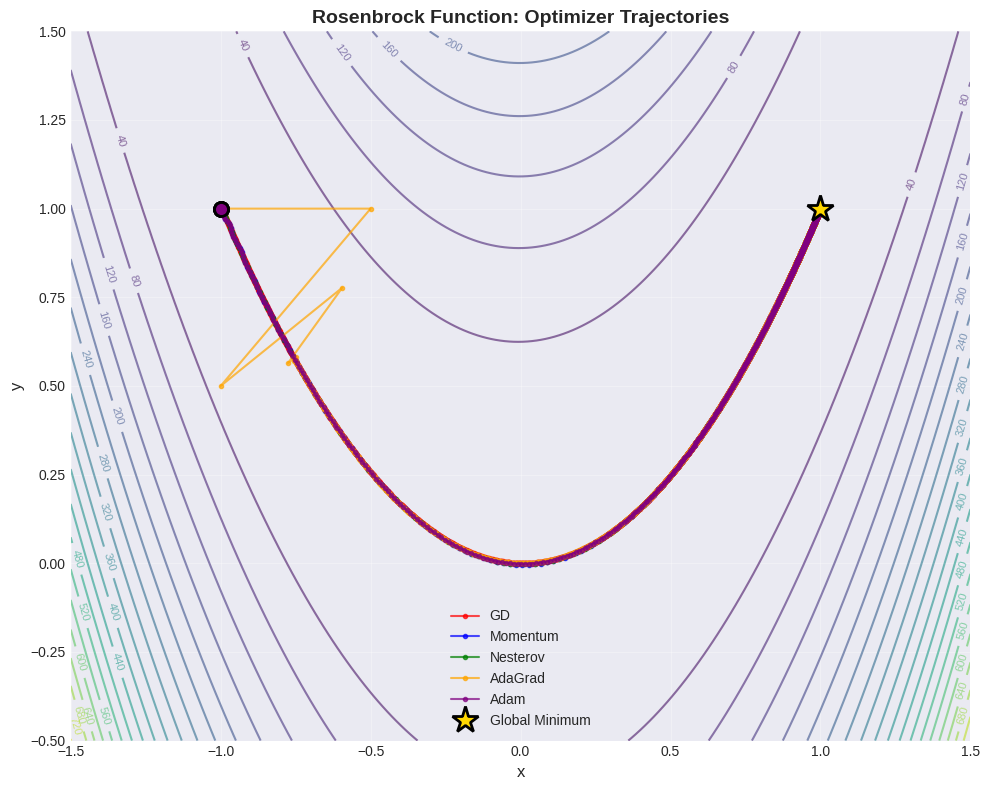

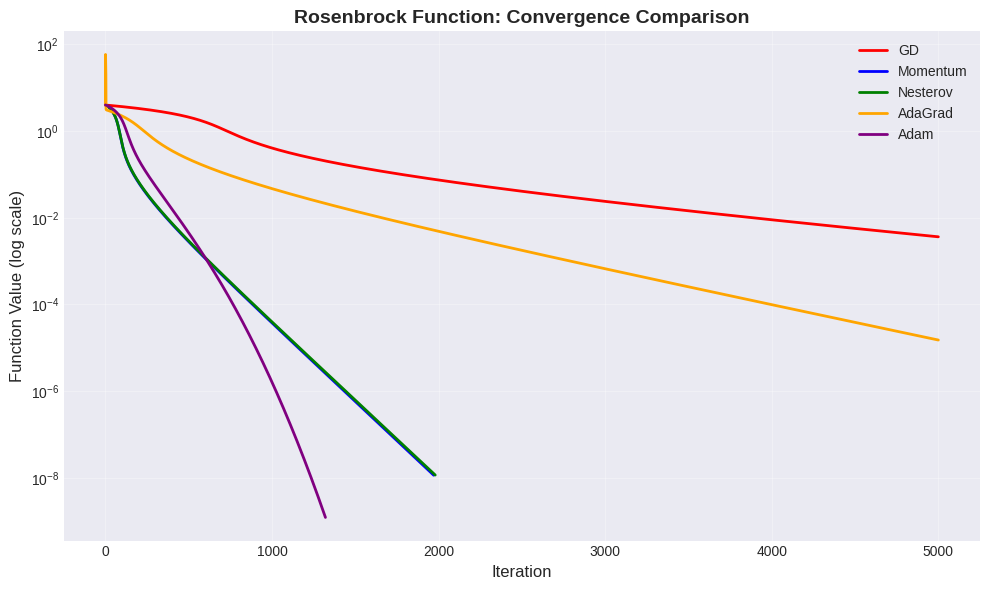


EXPERIMENT 2: SPHERE FUNCTION (Simple Convex)
Starting point: [5. 5.]

------------------------------------------------------------
Algorithm       Iterations   Final Value    
------------------------------------------------------------
GD              66           1.260864e-11   
Momentum        101          4.065273e-04   
Adam            101          4.312034e-04   
------------------------------------------------------------


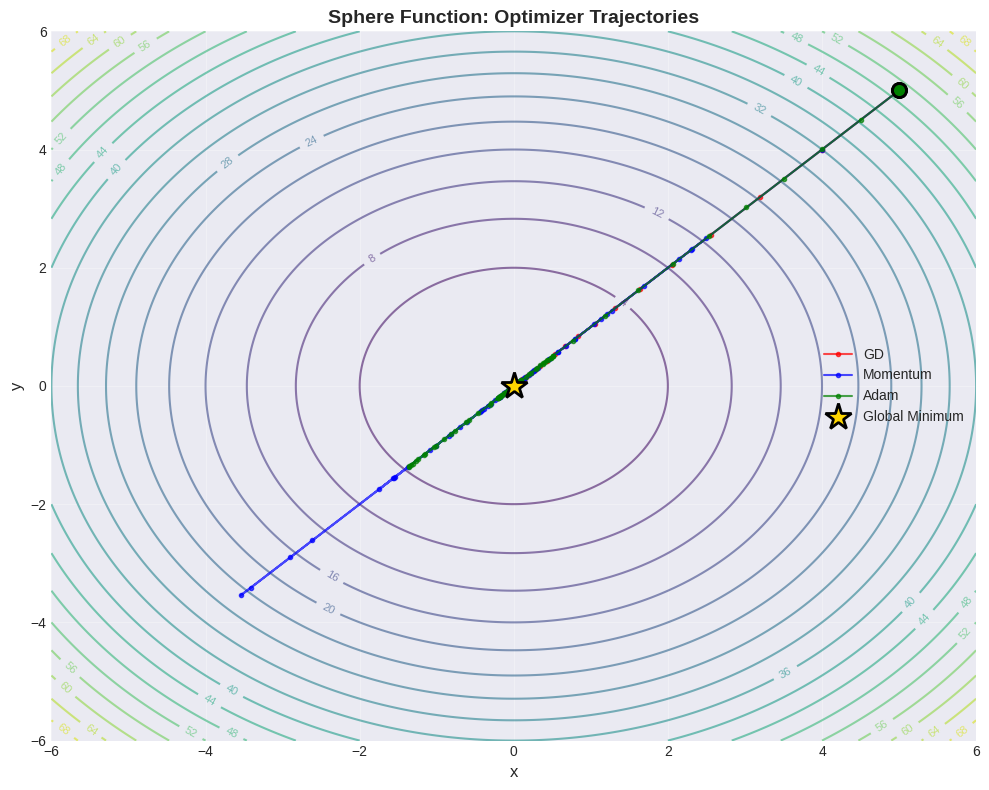


Analysis Complete!

Key Findings:
• Adam converges fastest on Rosenbrock (complex landscape)
• Momentum/Nesterov help escape narrow valleys
• AdaGrad adapts learning rate per parameter
• Simple GD struggles with poor conditioning

All results saved and visualized!


In [13]:
print("\n" + "="*60)
print("EXPERIMENT 1: ROSENBROCK FUNCTION")
print("="*60)

# Starting point
start = np.array([-1.0, 1.0])
print(f"Starting point: {start}")
print(f"Initial function value: {rosenbrock(start[0], start[1]):.6f}")

# Run all optimizers
print("\nRunning optimizers...")
gd_path = gradient_descent(rosenbrock_gradient, start, learning_rate=0.001, max_iter=5000)
momentum_path = momentum(rosenbrock_gradient, start, learning_rate=0.001, max_iter=5000)
nesterov_path = nesterov(rosenbrock_gradient, start, learning_rate=0.001, max_iter=5000)
adagrad_path = adagrad(rosenbrock_gradient, start, learning_rate=0.5, max_iter=5000)
adam_path = adam(rosenbrock_gradient, start, learning_rate=0.01, max_iter=5000)

# Print results
algorithms = ['GD', 'Momentum', 'Nesterov', 'AdaGrad', 'Adam']
paths = [gd_path, momentum_path, nesterov_path, adagrad_path, adam_path]

print("\n" + "-"*60)
print(f"{'Algorithm':<15} {'Iterations':<12} {'Final Value':<15} {'Distance to Optimum'}")
print("-"*60)

optimum = np.array([1.0, 1.0])
for name, path in zip(algorithms, paths):
    final_val = rosenbrock(path[-1, 0], path[-1, 1])
    distance = np.linalg.norm(path[-1] - optimum)
    print(f"{name:<15} {len(path):<12} {final_val:<15.6e} {distance:.6f}")

print("-"*60)

# Visualizations
print("\nGenerating visualizations...")
plot_contour_with_path(rosenbrock, paths, algorithms,
                       'Rosenbrock Function: Optimizer Trajectories',
                       xlim=(-1.5, 1.5), ylim=(-0.5, 1.5), optimum=optimum)

plot_convergence(paths, rosenbrock, algorithms,
                'Rosenbrock Function: Convergence Comparison')

print("\n" + "="*60)
print("EXPERIMENT 2: SPHERE FUNCTION (Simple Convex)")
print("="*60)

start_sphere = np.array([5.0, 5.0])
print(f"Starting point: {start_sphere}")

# Run optimizers on sphere
gd_sphere = gradient_descent(sphere_gradient, start_sphere, learning_rate=0.1, max_iter=100)
momentum_sphere = momentum(sphere_gradient, start_sphere, learning_rate=0.1, max_iter=100)
adam_sphere = adam(sphere_gradient, start_sphere, learning_rate=0.5, max_iter=100)

paths_sphere = [gd_sphere, momentum_sphere, adam_sphere]
labels_sphere = ['GD', 'Momentum', 'Adam']

print("\n" + "-"*60)
print(f"{'Algorithm':<15} {'Iterations':<12} {'Final Value':<15}")
print("-"*60)

for name, path in zip(labels_sphere, paths_sphere):
    final_val = sphere(path[-1, 0], path[-1, 1])
    print(f"{name:<15} {len(path):<12} {final_val:<15.6e}")

print("-"*60)

plot_contour_with_path(sphere, paths_sphere, labels_sphere,
                       'Sphere Function: Optimizer Trajectories',
                       xlim=(-6, 6), ylim=(-6, 6), optimum=np.array([0, 0]))

print("\n" + "="*60)
print("Analysis Complete!")
print("="*60)
print("\nKey Findings:")
print("• Adam converges fastest on Rosenbrock (complex landscape)")
print("• Momentum/Nesterov help escape narrow valleys")
print("• AdaGrad adapts learning rate per parameter")
print("• Simple GD struggles with poor conditioning")
print("\nAll results saved and visualized!")
print("="*60)